# Med Havvind 2I-1, 3J-1 3 april 2024
## Beskrivelse
Noter såvel som kode i forbindelse med forståelsen og behandlingen af data for Tvf.



Opstillingen er en Schlumberger 200 meter linjer

DOI = 80m (Depth of investigation)

Model = 20m

Injektionstid = 5,1 s A-B 






In [16]:
import sqlite3 as sq
import os

import matplotlib.pyplot as plt
import numpy as np

import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert



## Programmer

In [17]:
#vi skal bruge x y koord ab imnr
#db = sq.connect('/home/torben/Dropbox/MHV/MHV28_LS217080421_2024-04-03_08-32-54/project.db')
#cur = db.cursor()

#Græsk tastatur
γραεσκ = "setxkbmap \'dk,gr\' -variant \',polytonic\' -option \'grp:alt_shift_toggle\'"
os.popen(γραεσκ)
#Terameter toolbox
##$winecfg 
##winetricks msxml6
wine = "wine ~/.wine/drive_c/ProgramFiles\(x86\)/ABEM/Terrameter/TerrameterToolbox.exe"
os.popen(wine)
##eksporter til .udf

#qGis
##"ideelt noget med at kunne skrive direkte til iface"
os.popen('qgis --nologo --project ~/Dropbox/MHV/qGis/MHV20240401.qgz ')

<string>:1: DeprecationWarning: setapi() is deprecated


In [28]:
ρΑ = 'rhoa'

In [19]:
_3J1 = ert.load('/home/torben/Dropbox/MHV/MHV28_LS217080421_2024-04-03_08-32-54/nyfil.udf')
print(_3J1)

Data: Sensors: 84 data: 3831, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


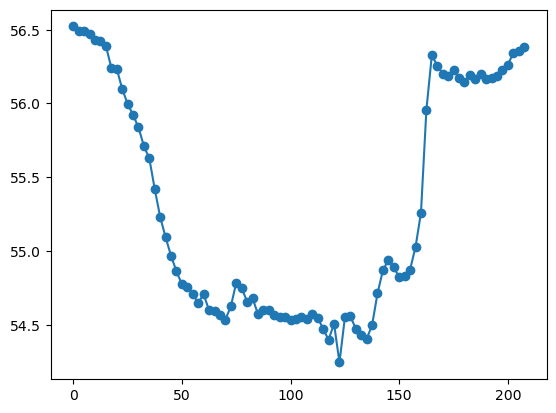

In [20]:
fig, ax = plt.subplots()
ax.plot(pg.x(_3J1), pg.z(_3J1), "o-")

$$Ρ(x,σ,μ,)=\frac{1}{σ\sqrt{2π}}e-^{(x-μ)²/2σ²}$$


In [21]:
# højde til udf
udf = '/home/torben/Dropbox/MHV/MHV28_LS217080421_2024-04-03_08-32-54/MHV28_grn2_v4_2.udf'
koord = '/home/torben/Dropbox/MHV/MHV28_LS217080421_2024-04-03_08-32-54/ERT enet mar24f.csv'
nyfil = '/home/torben/Dropbox/MHV/MHV28_LS217080421_2024-04-03_08-32-54/nyfil.udf'
b = 2611
s = 2696

z = [ i.split(',')[4] for i in open(koord).readlines()[b:s]]
print(len(z))
f = open(nyfil,'a')

for line in open(udf).readlines():
    line_split = line.split('\t')
    try:
        count = int(line.split(' ')[-1])
        line_split[2] = z[count]
        l = '\t'.join(line_split)
        f.write('{} #{}\n'.format(l,count))
    except:
        f.write(line)

f.close()
    


85


In [22]:
mgr_3J1 = ert.ERTManager(nyfil)
inv = mgr_3J1.invert(lam=20, verbose=True)
np.testing.assert_approx_equal(mgr.inv.chi2(), 0.7, significant=1)


21/06/24 - 11:09:31 - pyGIMLi - INFO - Found 2 regions.
21/06/24 - 11:09:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/06/24 - 11:09:31 - pyGIMLi - INFO - Found 2 regions.
21/06/24 - 11:09:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/06/24 - 11:09:31 - pyGIMLi - CRITICAL - <class 'pygimli.physics.ert.ertManager.ERTManager'>.checkData(ertManager.py:215)
Data contains no geometric factors data['k'].


Exception: Data contains no geometric factors data['k'].

21/06/24 - 11:09:32 - pyGIMLi - INFO - Cache /home/torben/miniconda3/miniconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (17.9s x 8): /home/torben/.cache/pygimli/10425235389467901910
21/06/24 - 11:09:32 - pyGIMLi - INFO - Cache /home/torben/miniconda3/miniconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 6): /home/torben/.cache/pygimli/15635112420437595812


<function pygimli.physics.ert.visualization.showERTData(data, vals=None, **kwargs)>

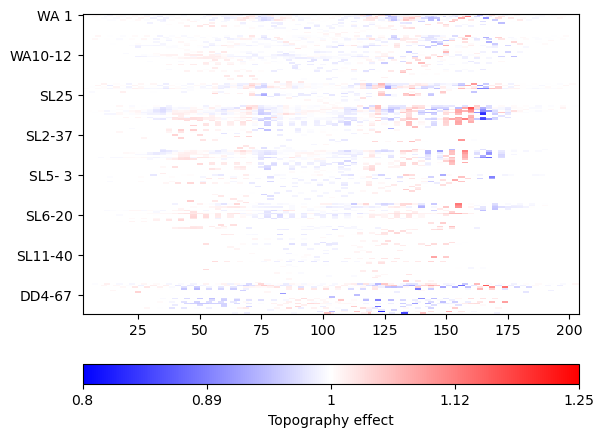

In [23]:
_3J1 = ert.load(nyfil)
_3J1['k'] = ert.createGeometricFactors(_3J1, numerical = True)

k0 = ert.createGeometricFactors(_3J1)
ert.show(_3J1, vals=k0/_3J1['k'], label='Topography effect',
        cMap="bwr", cMin=0.8, cMax=1.25, logScale=True);
ert.show



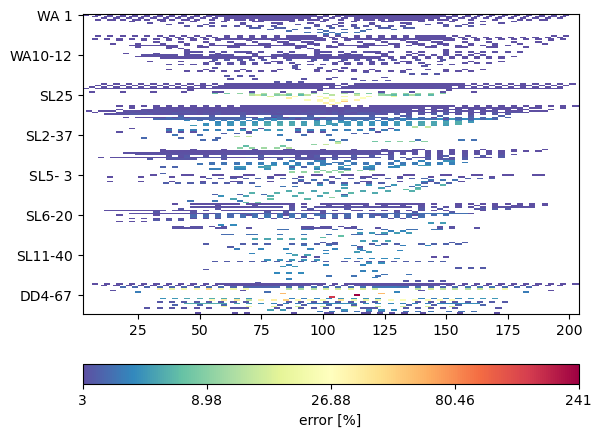

In [24]:

_3J1['err'] = ert.estimateError(_3J1, 
                                absoluteUError=0.00005, # 50µV
                                relativeError=0.03)  # 3%
ert.show(_3J1, _3J1['err']*100, label="error [%]");


In [25]:
WA 1 = Wenner
SL = Schlumberger
DD = Dipol dipol

Jupiter database
FOHM

SyntaxError: invalid syntax (172008789.py, line 1)

In [26]:
mgr = ert.ERTManager(_3J1)
mgr.invert(verbose=True,
           #paraDX=0.3, paraMaxCellSize=10, paraDepth=80, quality=50,
           lam=50, 
           zWeight=0.3,
          )

21/06/24 - 11:09:35 - pyGIMLi - INFO - Found 2 regions.
21/06/24 - 11:09:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/06/24 - 11:09:35 - pyGIMLi - INFO - Found 2 regions.
21/06/24 - 11:09:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/06/24 - 11:09:35 - pyGIMLi - INFO - Creating apparent resistivies from impedences rhoa = r * k
21/06/24 - 11:09:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/06/24 - 11:09:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/06/24 - 11:09:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3381 Cells: 6328 Boundaries: 4962
21/06/24 - 11:09:35 - pyGIMLi - INFO - Use median(data values)=74.3729206812466
21/06/24 - 11:09:35 - pyGIMLi - INFO - Created startmodel from forward operator: 1241, min/max=74.372921/74.372921
21/06/24 - 11:09:35 - pyGIMLi - INFO - Starting inversion.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  1

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  2

Statistics:

  Input vertices: 175
  Input segments: 176
  Input holes: 0

  Mesh vertices: 900
  Mesh triangles: 1582
  Mesh edges: 2481
  Mesh exterior boundary edges: 216
  Mesh interior boundary edges: 31
  Mesh subsegments (constrained edges): 247

Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner po

1241 [44.356527551017265,...,16.414794019252444]

In [27]:
inv = mgr.invert(lam=20, verbose=True)
np.testing.assert_approx_equal(mgr.inv.chi2(), 0.9, significant=1)

21/06/24 - 11:10:33 - pyGIMLi - INFO - Use median(data values)=74.3729206812466
21/06/24 - 11:10:33 - pyGIMLi - INFO - Created startmodel from forward operator: 1241, min/max=74.372921/74.372921
21/06/24 - 11:10:33 - pyGIMLi - INFO - Starting inversion.


Found datafile: 84 electrodes
Found: 84 node-electrodes
Found non-Neumann domain
 updateDataDependency:: cleaning primpot
min/max(dweight) = 0.415246/33.3197
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f6f665ace50>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f6f66007060>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7f6f665e38b0>
min/max (data): 13.18/625
min/max (error): 3%/241%
min/max (start model): 74.37/74.37
--------------------------------------------------------------------------------
use model trans from RegionManager
Calculating response for model: min = 74.3729 max = 74.3729
Allocating memory for primary potential...... 0.00460395

No primary potential for secondary field calculation with topography.
Creating P2-Primmesh:		Nodes: 13089	Cells: 6328	Boundaries: 9708
ModellingBase::setMesh() copying new mesh ... Found topography for surface=54.6106 : 54.6379
Found datafile: 84 electrodes
Found: 84 node

AssertionError: 
Items are not equal to 1 significant digits:
 ACTUAL: 0.3481322697595383
 DESIRED: 0.9

In [ ]:
mgr.showResultAndFit()
meshPD = pg.Mesh(mgr.paraDomain) # Save copy of para mesh for plotting later

In [ ]:
mgr.showResult(cMin=0, cMax=2000)

In [ ]:
geo = pg.meshtools.createParaMeshPLC(_3J1, paraMaxCellSize=100)
#geo += line
ax, _ = pg.show(geo);
ax.set_xlim(-20, 230);
ax.set_ylim(-60, 5);

In [1]:
pg.show(geo)

NameError: name 'pg' is not defined